## Introduction

- **Some key featuers of this algo are**:
        -> Partition clutsering
        -> Divides the data into K non-overlapping clusters without any cluster internal structure.
        -> Examples within a cluster are very similar.
- K-Means minimizes intra-cluster (i.e within a cluster) distance and maximizes inter-cluster distances.
- Similarity is measured either as Eulcedian or Cosine similarity.
- Result may not always give an optimal solution.
- *Accuracy* : *Average the distance between the data points and the centroids of the clusters.*
- Some real world applications of K-Means:
    * Customer segmentation
    * Understand what the visitors of a website are trying to accomplish
    * Pattern Recognition
    * Machine learning 
    * Data Compression

### Import libraries

Lets first import the required libbraries. Also run **%matplotlib inline** as we will be plotting our result.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

### K-Means on a Randomly generated dataset
Let's create our own dataset first.

We need to set up a random seed. Use numpy's random seed to fix the seed.

In [2]:
np.random.seed(0)

Next we will be making <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br>
<b> <u> Input </u> </b>
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>


In [3]:
X, y = make_blobs(n_samples=5000, centers=[[4, 4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

In [4]:
print(X.shape, y.shape)

(5000, 2) (5000,)


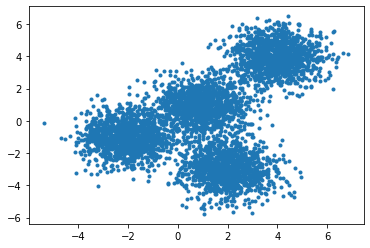

In [5]:
plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.show()

### Setting up K-Means
Now that we have our random dataset generated, let's set up our K-Means clustering.

The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.

In [6]:
k_means = KMeans(init='k-means++', n_clusters=4, n_init=12)

Now, let's fit the K-Means model with the feature matrix we created above.

In [7]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Now, let's grab the labels for each point in the model using **KMeans.labels_** attribute and save it as k_means_labels.

In [8]:
k_means_labels = k_means.labels_
k_means_labels # as we have four clusters in total, this array will contain the label of each data point depiciting that which cluster it belongs to accroding to our model iterations

array([0, 3, 3, ..., 1, 0, 0])

We will also get the coordinates of the centers using Kmeans.cluster_centers_ and save it as k_means_cluster_centers.

In [9]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers # we got the output cluster centers as predicted by our model, Now compare them with our ground truth center coordinates above

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

### Creating the Visual Plot
So, now that we have the random data generated and the KMeans model initiliazed, let's plot them and see what it looks like.

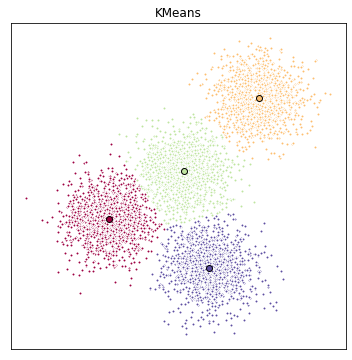

In [10]:
# initialize the plot with specified dimensions
fig = plt.figure(figsize=(6, 6))

# Colors uses a color map, which will produce an array of colors 
# based on the number of labels there are. We use set(k_means_labels) to
# get the unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the dataset generated to see which point lie in which cluster
for k, col in zip(range(len(k_means_cluster_centers)), colors):
    # create a list of all datapoints , where the data points that are
    # in the cluster are labeles as true, else they are marked as false
    my_mem = (k_means_labels == k)
    
    # define the centroid or clusetr center
    cluster_center = k_means_cluster_centers[k]
    
    # plot the datapoints with color
    ax.plot(X[my_mem, 0], X[my_mem, 1], 'w', markerfacecolor=col, marker='.')
    
    # plot the centroids with specified color 
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
           markeredgecolor='k', markersize=6)
    
#Title of the plot
ax.set_title('KMeans')

# Remove x- and y-axis numbers i.e ticks
ax.set_xticks(())
ax.set_yticks(())

plt.show()

#### Let's play with our hyperparameter, K

In [11]:
# let's take k = 3, i.e let's try to fit our dataset into 3 cluster centroids
k_means3 = KMeans(init='k-means++', n_clusters=3, n_init=12)

# fit our feature vector
k_means3.fit(X)

# extract our output labels
k_means3_labels = k_means3.labels_
print(k_means3_labels)

# extract out cluster centers
k_means3_cluster_centers = k_means3.cluster_centers_
print(k_means3_cluster_centers)

[1 2 2 ... 0 1 1]
[[ 3.70310165  3.69627302]
 [-0.80700142 -0.17035769]
 [ 2.02030226 -2.94614399]]


Can you visualize the centroids in our datapoints? Don't worry. We have matplotlib to deal with that.

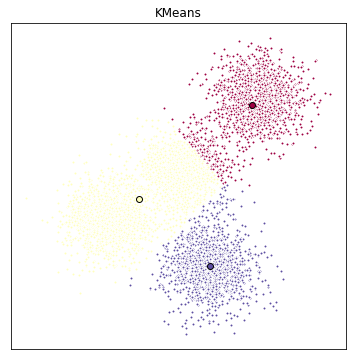

In [12]:
# initialize the plot with specified dimensions
fig = plt.figure(figsize=(6, 6))

# Colors uses a color map, which will produce an array of colors 
# based on the number of labels there are. We use set(k_means_labels) to
# get the unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3_labels))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the dataset generated to see which point lie in which cluster
for k, col in zip(range(len(k_means3_cluster_centers)), colors):
    # create a list of all datapoints , where the data points that are
    # in the cluster are labeles as true, else they are marked as false
    my_mem = (k_means3_labels == k)
    
    # define the centroid or clusetr center
    cluster_center = k_means3_cluster_centers[k]
    
    # plot the datapoints with color
    ax.plot(X[my_mem, 0], X[my_mem, 1], 'w', markerfacecolor=col, marker='.')
    
    # plot the centroids with specified color 
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
           markeredgecolor='k', markersize=6)
    
#Title of the plot
ax.set_title('KMeans')

# Remove x- and y-axis numbers i.e ticks
ax.set_xticks(())
ax.set_yticks(())

plt.show()

Well, doesn't seem great. But, we can play with the number K and cross validate our result until we get the best outcome.

Let's Play with some real data. Let's head to the most heard problem : Customer Segmentation.